### 1. Analyze the time series in "data.csv". 

r: quarterly t-bill rate

y: quarterly log GDP

pi: quarterly in􏰄ation rate

(a) Import the data in R.

In [1]:
#import sys
#!{sys.executable} -m pip install <tseries>

In [2]:
setwd("/Users/yongjai/Jupyter_Notebook/R/Adv_Fin/A1")

mydata <- read.csv("data.csv", header=TRUE)

head(mydata, n=10)

r,y,pi
1.41,7.894976,0.0000000
1.47,7.911123,0.0000000
2.15,7.924480,0.7490637
2.50,7.930480,-0.3717472
2.30,7.926614,0.0000000
2.42,7.934826,1.4925373
2.91,7.934008,0.7352941
3.22,7.950234,0.7299270
2.96,7.956658,0.7246377
3.22,7.954438,1.0791367


(b) Plot the three time series.

In [1]:
#mytime <- ts(mydata, frequency=4)
mytime <- as.ts(mydata)
mytime

ERROR: Error in as.ts(mydata): object 'mydata' not found


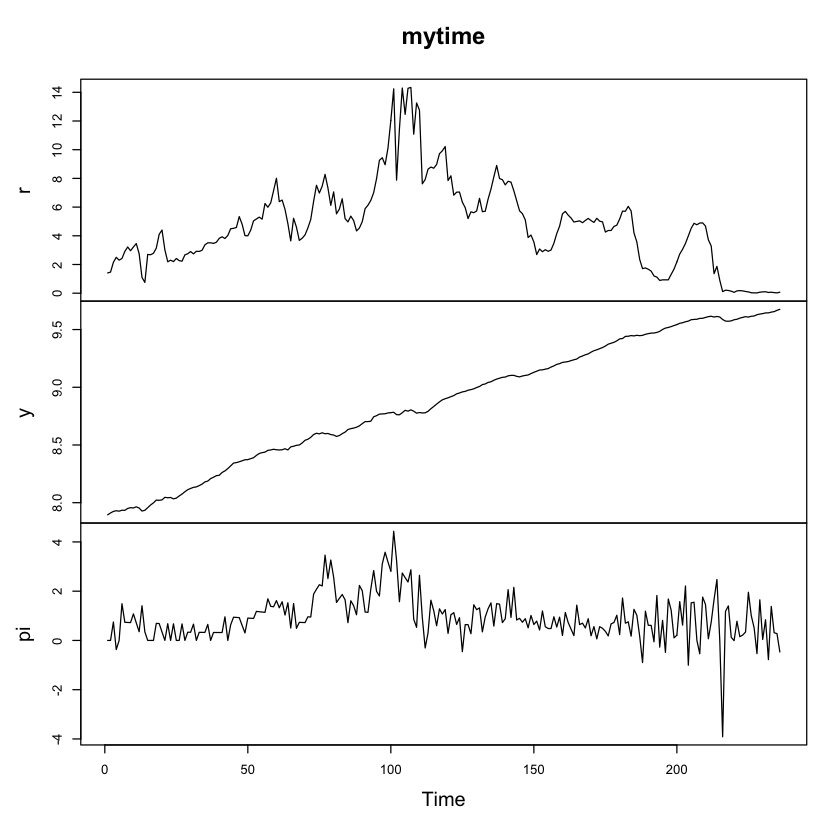

In [4]:
plot(mytime)

(c) Plot their auto-correlation functions

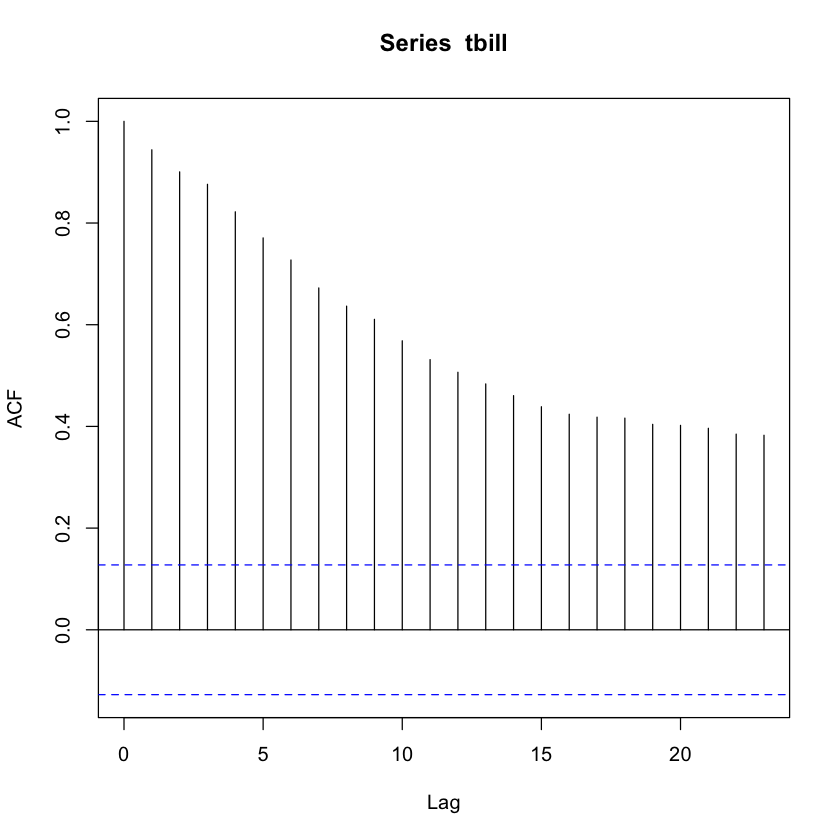

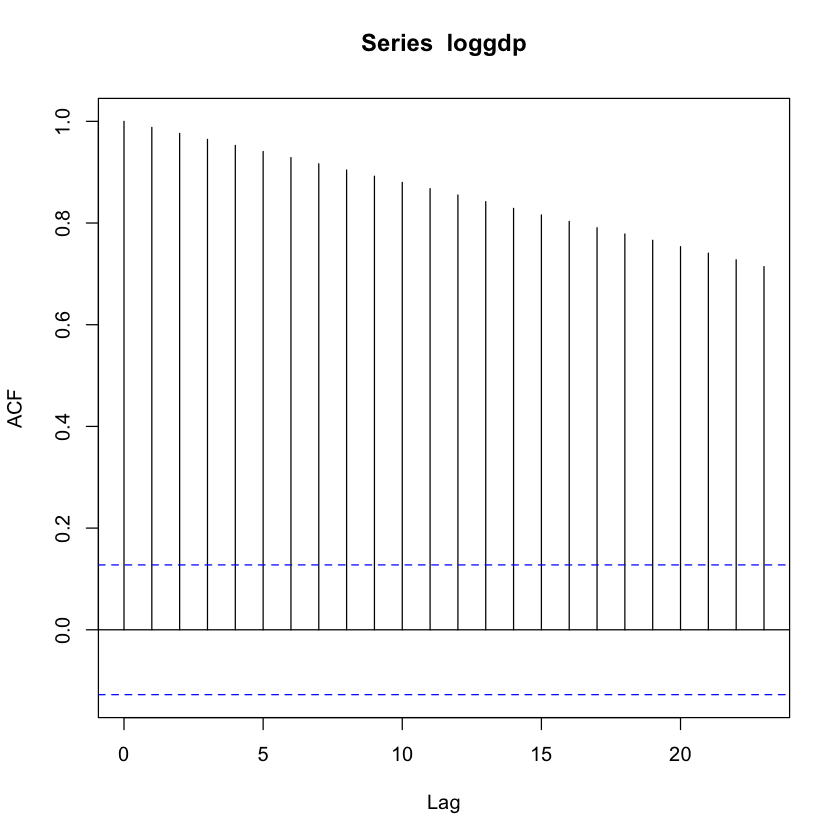

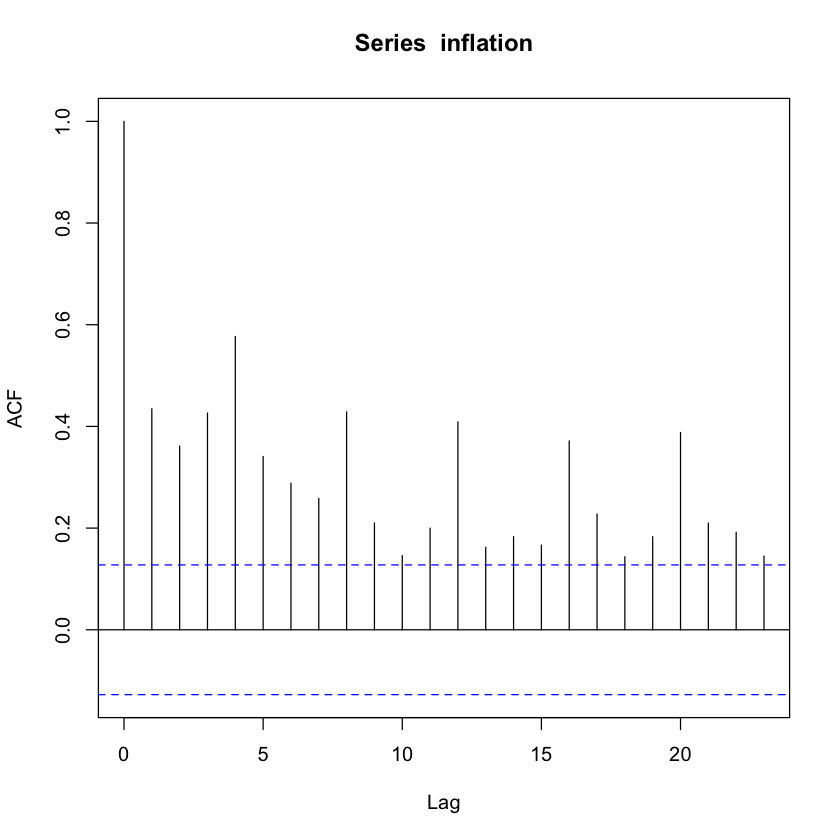

In [5]:
tbill = mydata[, 'r']
tbill_s <- as.ts(tbill)
acf(tbill)

loggdp = mydata[, 'y']
loggdp_s <- as.ts(loggdp)
acf(loggdp)

inflation = mydata[, 'pi']
inflation_s <- as.ts(inflation)
acf(inflation)

(d) Run the ADF test on the three series.

In [6]:
#install.packages("tseries")
library(tseries)
adf.test(tbill_s)
adf.test(loggdp_s)
adf.test(inflation_s)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  tbill_s
Dickey-Fuller = -2.5622, Lag order = 6, p-value = 0.3395
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  loggdp_s
Dickey-Fuller = -1.3474, Lag order = 6, p-value = 0.8502
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  inflation_s
Dickey-Fuller = -3.1444, Lag order = 6, p-value = 0.09794
alternative hypothesis: stationary


(e) Describe the signs of non stationarity seen in the time series and ACF plots.

Noticeable trends and changing levels can be seen in loggdp.

Prominent seasonality can be observed in tbill rate.

Looking at ACF, non-stationary data tend to degrade more slowly. Tbill and loggdp seem nonstationary while inflation seems to be stationary.

(f) Use the ADF tests to decide which of the series are nonstationary. Do the tests corroborate the conclusions of the time series and ACF plots?

ADF tests show that tbill and loggdp are nonstationary while inflation is stationary. (reject the null that it is nonstationary at 10% level) The tests corroborate the conclusions of the time series and ACF plots.

(g) Run the ADF test on the differenced series and plot them. Are they stationary?

Warning message in adf.test(D_tbill):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D_tbill
Dickey-Fuller = -6.3425, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(D_loggdp):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D_loggdp
Dickey-Fuller = -5.6647, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(D_inflation):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D_inflation
Dickey-Fuller = -7.9521, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


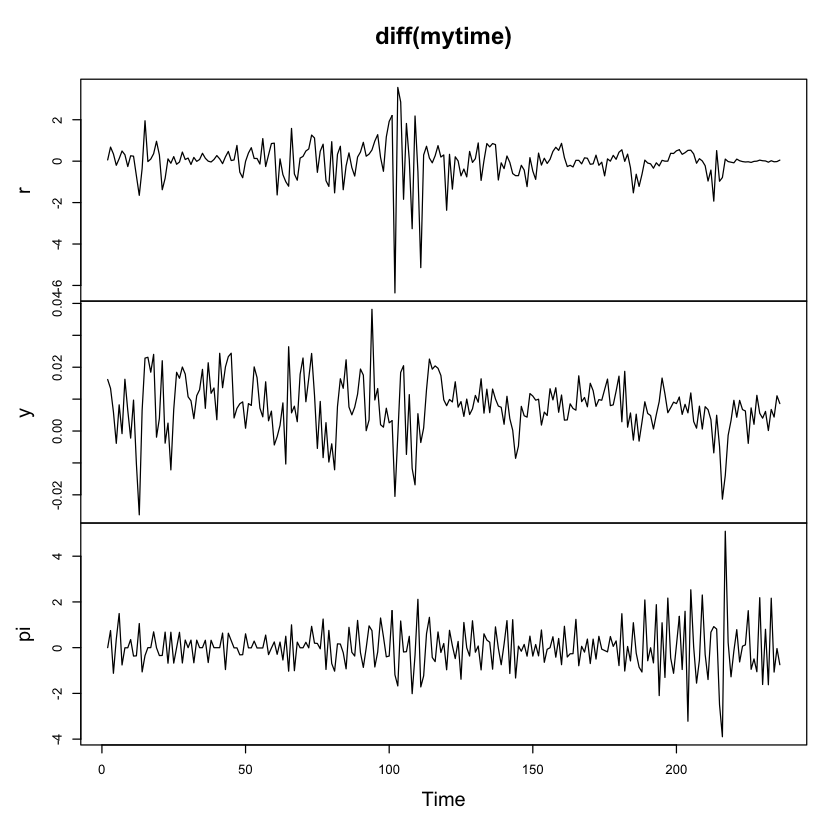

In [7]:
D_tbill = diff(tbill_s)
D_loggdp = diff(loggdp_s)
D_inflation = diff(inflation_s)

adf.test(D_tbill)
adf.test(D_loggdp)
adf.test(D_inflation)

plot(diff(mytime))

The differenced series are stationary.

(h) Do you see evidence of autocorrelation in the differenced series? If so, describe these correlations.

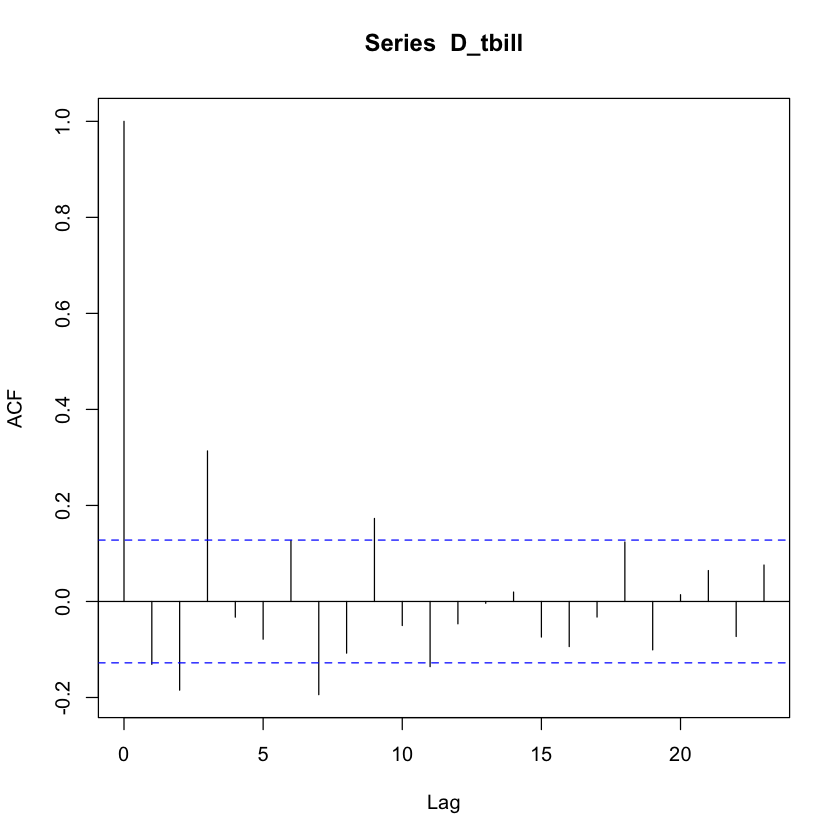

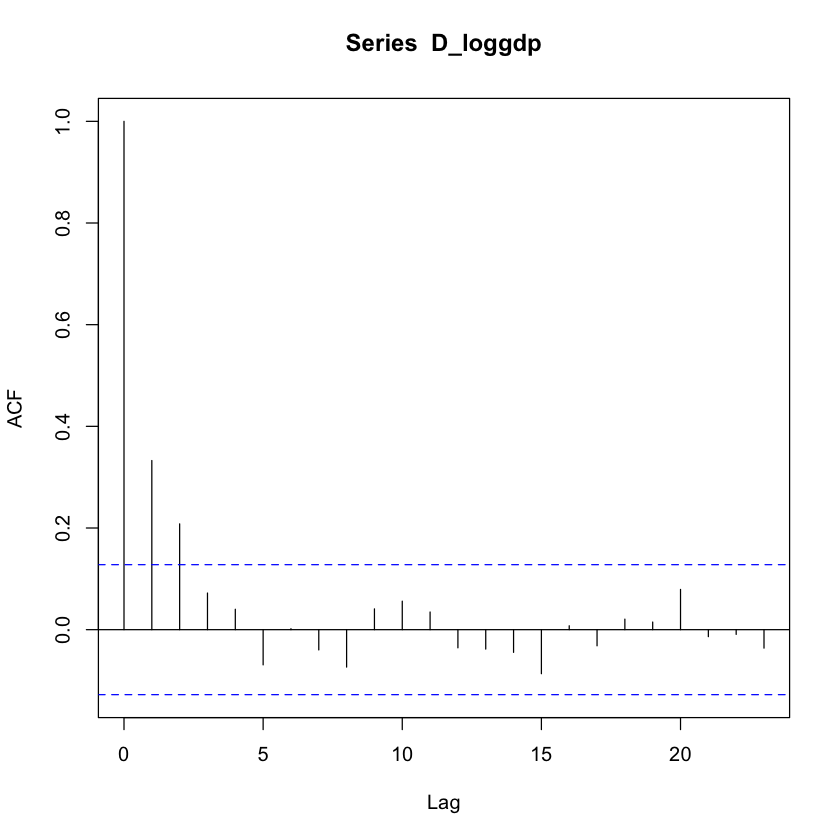

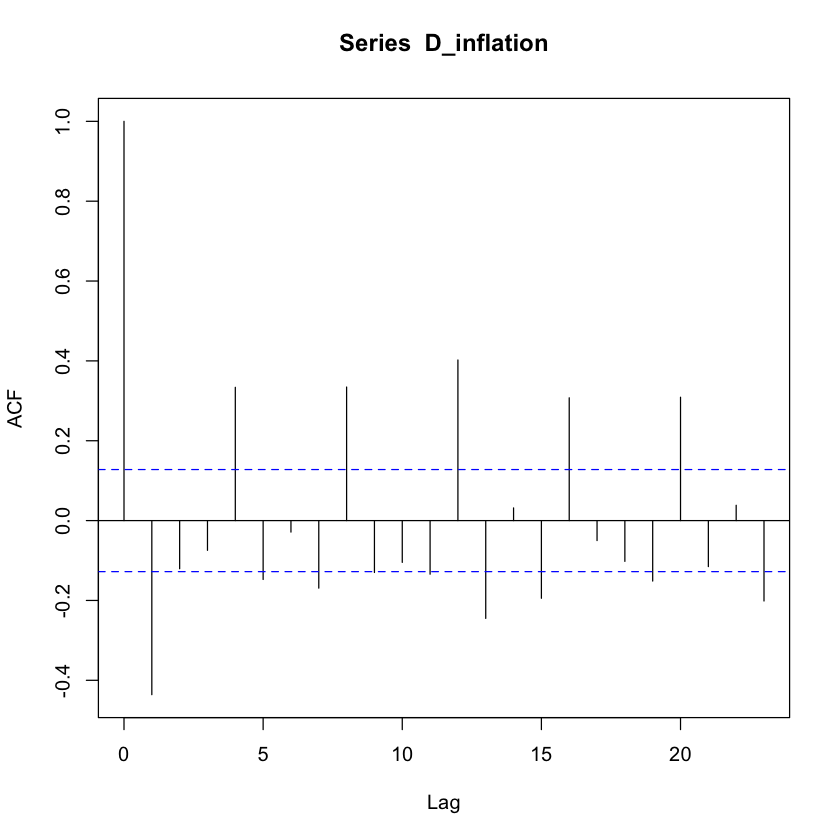

In [8]:
acf(D_tbill)
acf(D_loggdp)
acf(D_inflation)

I see some evidence of autocorrelation in the differenced series. D_loggdp has around 0.3 correlation with its first lag, D_inflation has around -0.4 correlation with its first lag. I see no evidence of autocorrelation in the D_tbill.

(i) Fit an automatic ARIMA model to the "r" and "y" series using the R function auto.arima() in the package forecast to find a best-fitting ARIMA model, setting the seasonal AR and MA components to zero (e.g., set max.P=0 and max.Q=0 in the function) using the AIC criterion.

In [9]:
library(forecast)

auto.arima(tbill_s, max.P=0, max.Q=0,ic="aic")
auto.arima(loggdp_s, max.P=0, max.Q=0,ic="aic")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



Series: tbill_s 
ARIMA(0,1,3) 

Coefficients:
          ma1      ma2     ma3
      -0.1438  -0.1008  0.3312
s.e.   0.0603   0.0586  0.0660

sigma^2 = 0.7595:  log likelihood = -299.8
AIC=607.61   AICc=607.78   BIC=621.45

Series: loggdp_s 
ARIMA(1,1,1) with drift 

Coefficients:
         ar1      ma1   drift
      0.5488  -0.2414  0.0076
s.e.  0.1327   0.1504  0.0009

sigma^2 = 6.98e-05:  log likelihood = 792.91
AIC=-1577.81   AICc=-1577.64   BIC=-1563.98

i. What order of differencing is chosen? What model was chosen by AIC?

Think of ARIMA(p,d,q) as ARIMA(AR,I,MA). I means Integration and the order of difference. 

1st order of difference is chosen for both tbill and loggdp.

For tbill, ARIMA(0,1,3) is chosen. The order of lag is 0, order of difference 1, order of the error lag 3.

For loggdp, ARIMA(1,1,1) with drift is chosen. The order of lag is 1, order of difference 1, order of the error lag 1.

I: The time series uses differencing to make it stationary.
AR: The time series is regressed with its previous values.
MA: The time series is regressed with residuals of the past observations.

ii. Change the criterion to BIC. Does the best-fitting model change?

In [10]:
auto.arima(tbill_s, max.P=0, max.Q=0,ic="bic")
auto.arima(loggdp_s, max.P=0, max.Q=0,ic="bic")

Series: tbill_s 
ARIMA(0,1,3) 

Coefficients:
          ma1      ma2     ma3
      -0.1438  -0.1008  0.3312
s.e.   0.0603   0.0586  0.0660

sigma^2 = 0.7595:  log likelihood = -299.8
AIC=607.61   AICc=607.78   BIC=621.45

Series: loggdp_s 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1   drift
      0.3327  0.0076
s.e.  0.0614  0.0008

sigma^2 = 7.017e-05:  log likelihood = 791.79
AIC=-1577.58   AICc=-1577.47   BIC=-1567.2

Yes, only for the loggdp.

For tbill, ARIMA(0,1,3) is chosen. The order of lag is 0, order of difference 1, order of the error lag 3.

For loggdp, ARIMA(1,1,0) with drift is chosen. The order of lag is 1, order of difference 1, order of the error lag 0.

iii. Using the model chosen by AIC, calculate the residuals. Is there residual autocorrelation?


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 15.842, df = 7, p-value = 0.0266

Model df: 3.   Total lags used: 10



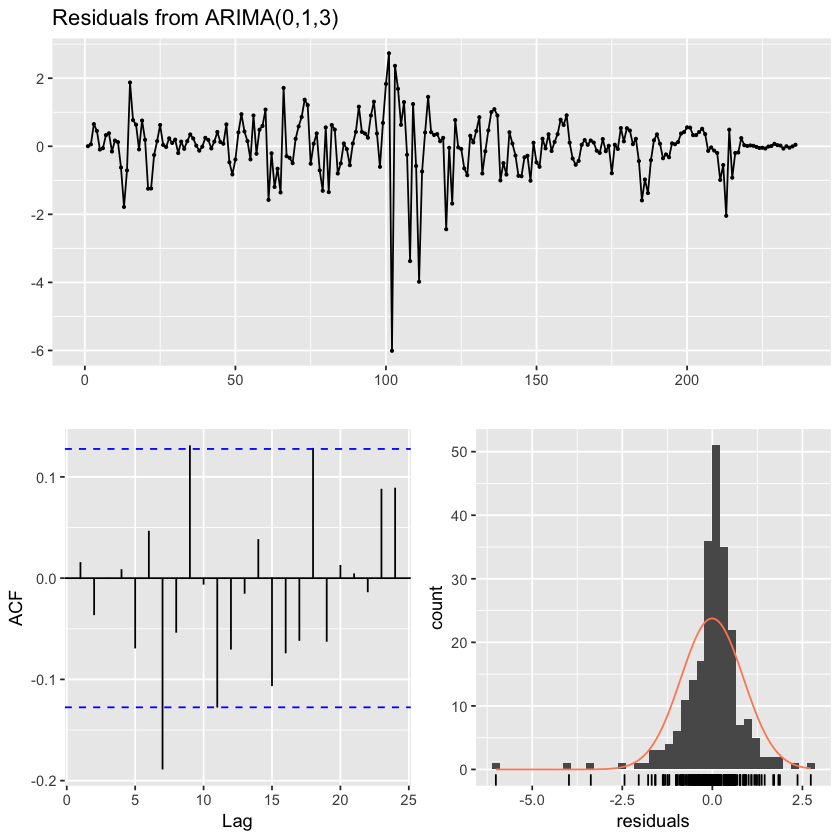


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1) with drift
Q* = 7.7921, df = 7, p-value = 0.3513

Model df: 3.   Total lags used: 10



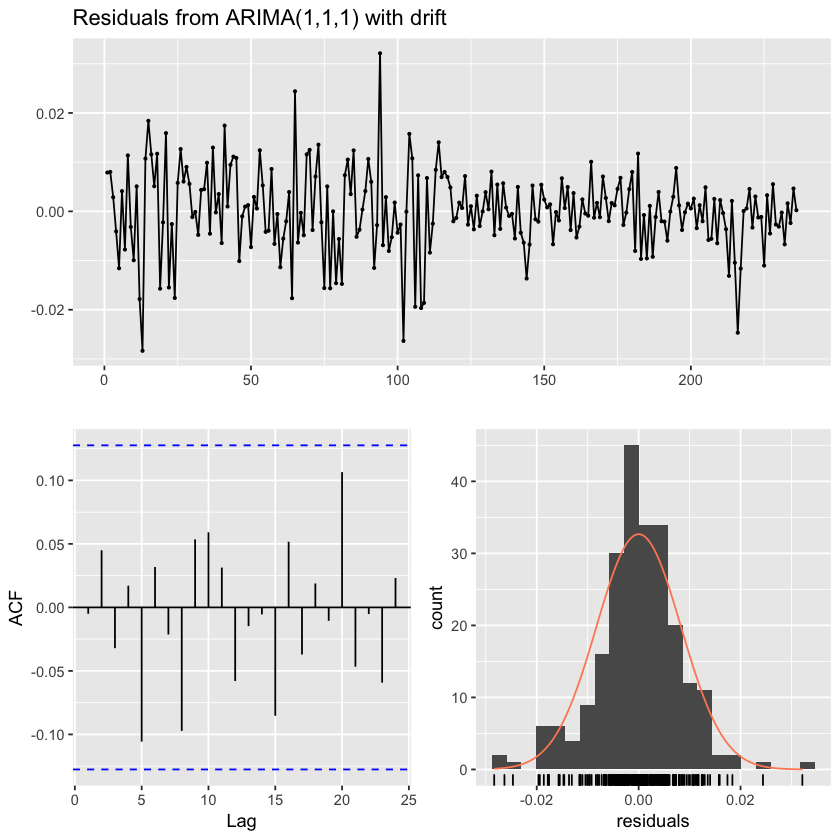

In [11]:
arima_tbill=auto.arima(tbill_s, max.P=0, max.Q=0,ic="aic")
arima_loggdp=auto.arima(loggdp_s, max.P=0, max.Q=0,ic="aic")

checkresiduals(arima_tbill)
checkresiduals(arima_loggdp)

There is no residual autocorrelation for loggdp, but there is residual autocorrelation for tbill.

ACF is in the bountry and p value is 0.35 for loggdp. ACF is outside the bountry and p value is 0.026 for loggdp.

iv. Do you see any GARCH effects in the (mean-centered) squared residuals? Explain.


Attaching package: ‘aTSA’


The following object is masked from ‘package:forecast’:

    forecast


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 36.1 2.71e-07
[2,]     8 51.3 2.34e-08
[3,]    12 93.9 8.55e-15
[4,]    16 94.4 3.84e-13
[5,]    20 96.0 6.38e-12
[6,]    24 96.2 1.33e-10
Lagrange-Multiplier test: 
     order    LM p.value
[1,]     4 260.4  0.0000
[2,]     8 107.1  0.0000
[3,]    12  28.1  0.0031
[4,]    16  19.0  0.2151
[5,]    20  13.4  0.8191
[6,]    24  10.4  0.9886
ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 37.1 1.71e-07
[2,]     8 49.5 5.15e-08
[3,]    12 75.7 2.74e-11
[4,]    16 76.2 8.10e-10
[5,]    20 80.2 3.64e-09
[6,]    24 80.3 5.39e-08
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 90.58 0.00e+00
[2,]     8 40.30 1.10e-06
[3,]    12 22.20 2.29e-02
[4,]    16 15.34 4.27e-01
[5,]    20 10.26 9.46e-01
[6,]    24  7.81 9.99e-01


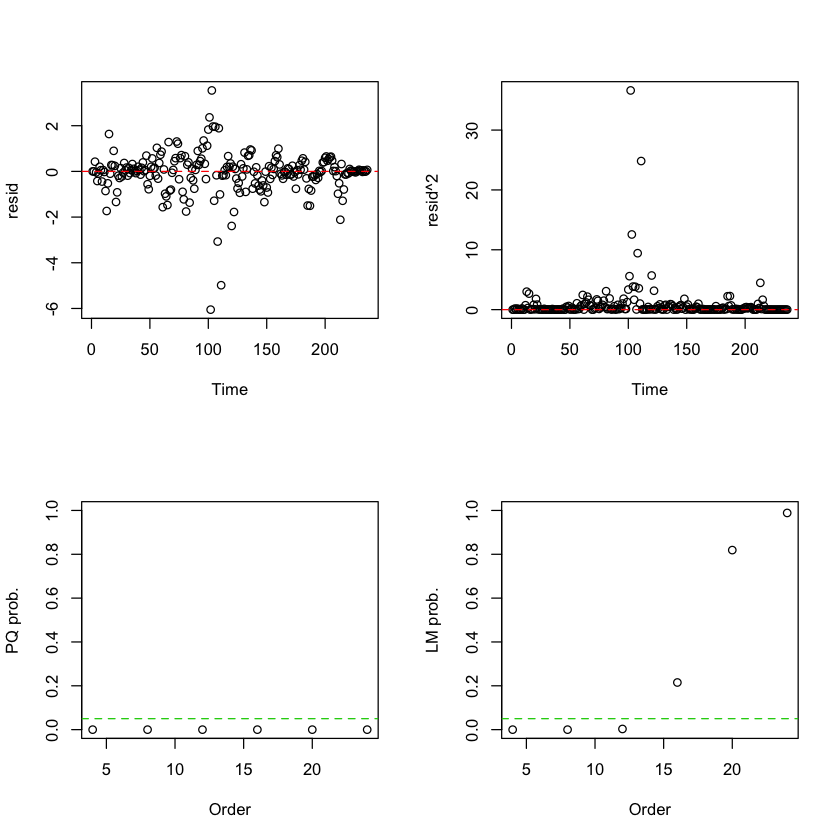

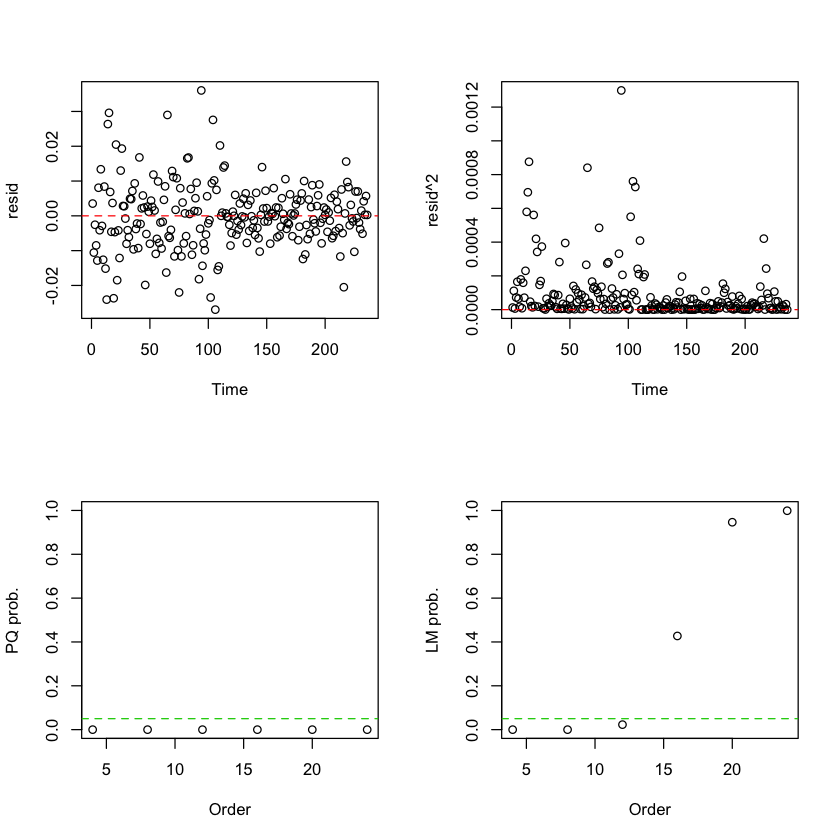

In [12]:
library(aTSA)

arch.test(arima(tbill_s,order=c(0,1,3),seasonal=c(0,1,0)),output=TRUE)
arch.test(arima(loggdp_s,order=c(1,1,0),seasonal=c(0,1,0)),output=TRUE)

Yes. The arch test confirms the presence of arch effects for both variables. The test coefficients are significant. We reject the null hypothesis that the squared residuals are a sequence of white noise, that the residuals are homoscedastic. Thus, the residuals are heteroscedastic.

### 2. Same dataset

(a) Import the data in R.

Already done

In [13]:
head(mydata, n=10)

r,y,pi
1.41,7.894976,0.0000000
1.47,7.911123,0.0000000
2.15,7.924480,0.7490637
2.50,7.930480,-0.3717472
2.30,7.926614,0.0000000
2.42,7.934826,1.4925373
2.91,7.934008,0.7352941
3.22,7.950234,0.7299270
2.96,7.956658,0.7246377
3.22,7.954438,1.0791367


(b) Find the best-fitting multivariate AR to changes in the three series.

In [14]:
var_tbill=ar(D_tbill,order.max=4, aic=T)
var_loggdp=ar(D_loggdp,order.max=4, aic=T)
var_inflation=ar(D_inflation,order.max=4, aic=T)

var_tbill
var_loggdp
var_inflation


Call:
ar(x = D_tbill, aic = T, order.max = 4)

Coefficients:
      1        2        3  
-0.1016  -0.1622   0.2735  

Order selected 3  sigma^2 estimated as  0.7618


Call:
ar(x = D_loggdp, aic = T, order.max = 4)

Coefficients:
     1       2  
0.2963  0.1096  

Order selected 2  sigma^2 estimated as  6.939e-05


Call:
ar(x = D_inflation, aic = T, order.max = 4)

Coefficients:
      1        2        3  
-0.7777  -0.6580  -0.4550  

Order selected 3  sigma^2 estimated as  0.5159

(c) Check the correlation of the residuals.

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”
Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


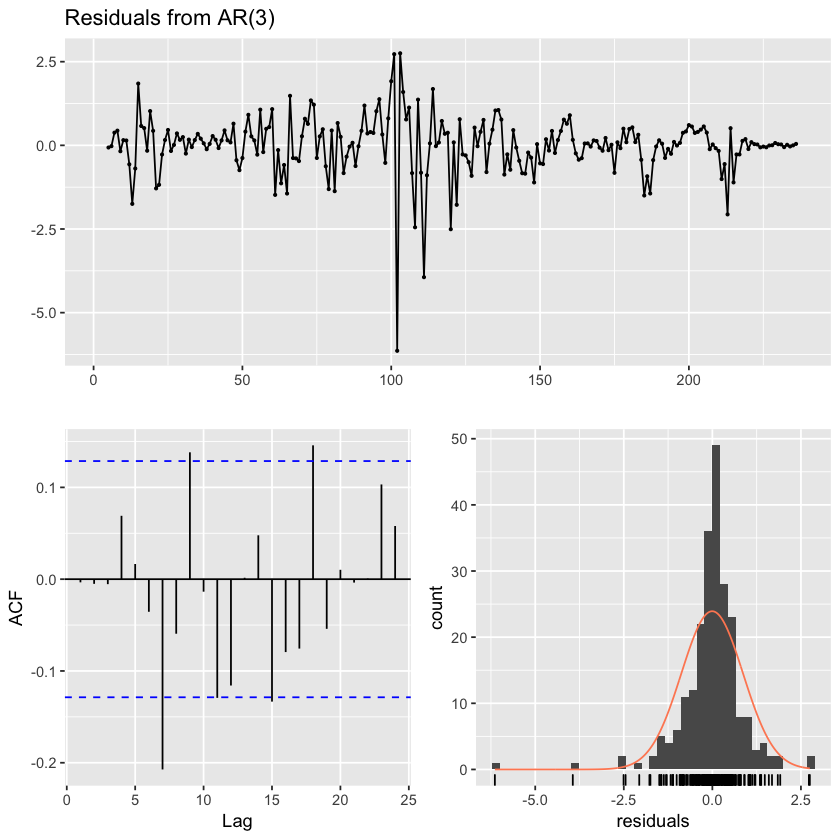

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


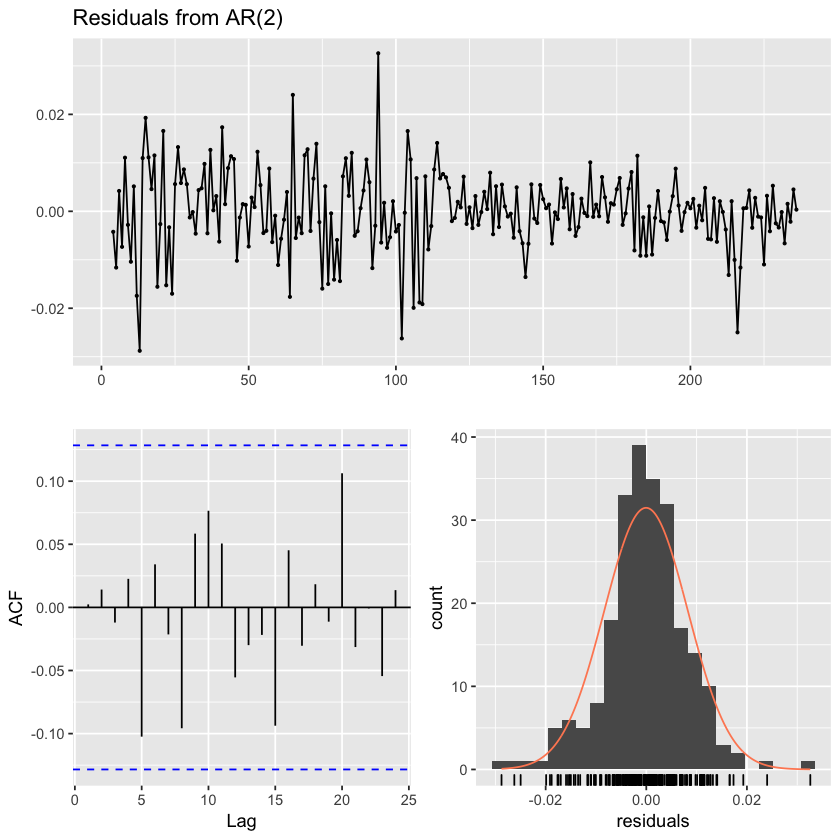

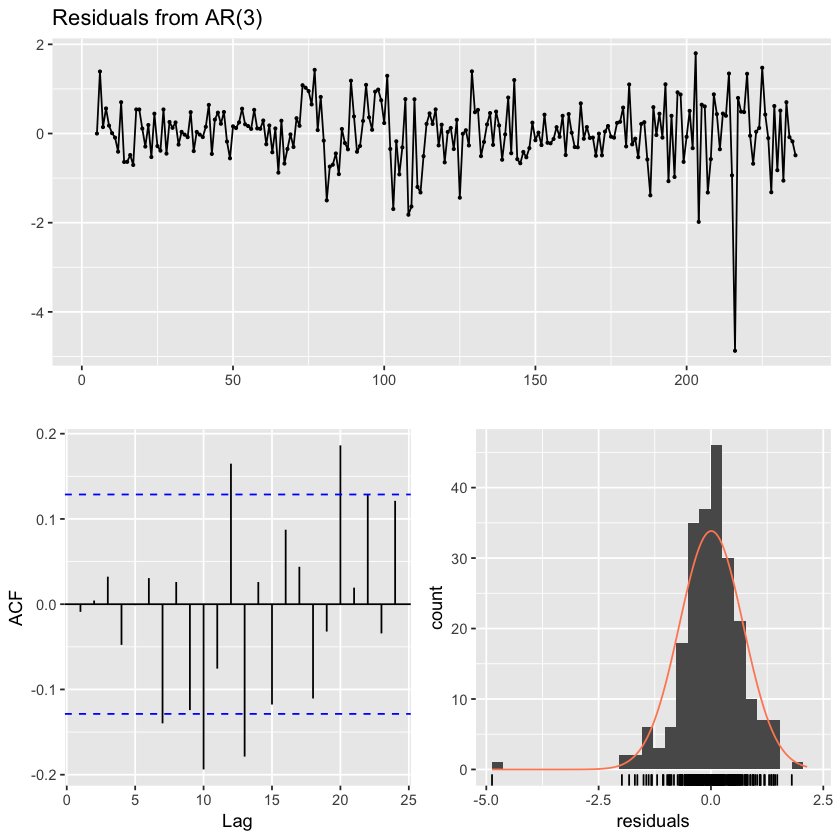

In [15]:
checkresiduals(var_tbill)
checkresiduals(var_loggdp)
checkresiduals(var_inflation)

loggdp has no autocorrelation of residuals while others have. 

(d) What are the coefficient estimates.

tbill: $\phi_1$ = -0.1016, $\phi_2$ =  -0.1622, $\phi_3$ =  0.2735  

loggdp: $\phi_1$ = 0.2963, $\phi_2$ = 0.1096  

inflation: $\phi_1$ = -0.7777, $\phi_2$ = -0.6580, $\phi_3$ = -0.4550

(e) What is the estimated covariance matrix of the residuals $\epsilon_t$?

In [163]:
varmytime=VAR(diff(mytime), p=1, type="both")
varmytime


VAR Estimation Results:

Estimated coefficients for equation r: 
Call:
r = r.l1 + y.l1 + pi.l1 + const + trend 

         r.l1          y.l1         pi.l1         const         trend 
-0.1340403414 12.1358678545 -0.1698954503 -0.0064718356 -0.0007762231 


Estimated coefficients for equation y: 
Call:
y = r.l1 + y.l1 + pi.l1 + const + trend 

         r.l1          y.l1         pi.l1         const         trend 
 1.027752e-03  2.858627e-01  5.869070e-04  6.825413e-03 -1.220098e-05 


Estimated coefficients for equation pi: 
Call:
pi = r.l1 + y.l1 + pi.l1 + const + trend 

         r.l1          y.l1         pi.l1         const         trend 
 0.2093419272 -1.1322133233 -0.4749487456  0.0293497696 -0.0001770607 



In [164]:
summary(varmytime)


VAR Estimation Results:
Endogenous variables: r, y, pi 
Deterministic variables: both 
Sample size: 234 
Log Likelihood: 206.39 
Roots of the characteristic polynomial:
0.3377 0.3377 0.3147
Call:
VAR(y = diff(mytime), p = 1, type = "both")


Estimation results for equation r: 
r = r.l1 + y.l1 + pi.l1 + const + trend 

        Estimate Std. Error t value Pr(>|t|)   
r.l1  -0.1340403  0.0678190  -1.976  0.04930 * 
y.l1  12.1358679  7.0664812   1.717  0.08726 . 
pi.l1 -0.1698955  0.0627921  -2.706  0.00733 **
const -0.0064718  0.1381791  -0.047  0.96268   
trend -0.0007762  0.0008896  -0.873  0.38381   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9082 on 229 degrees of freedom
Multiple R-Squared: 0.06503,	Adjusted R-squared: 0.0487 
F-statistic: 3.982 on 4 and 229 DF,  p-value: 0.003827 


Estimation results for equation y: 
y = r.l1 + y.l1 + pi.l1 + const + trend 

        Estimate Std. Error t value Pr(>|t|)    
r.l1   1.028e-03  6.19

estimated covariance matrix of the residuals are above.

(f) If the model fits adequately, there should be no residual auto or crosscorrelation.
Do you believe that the model fits well?

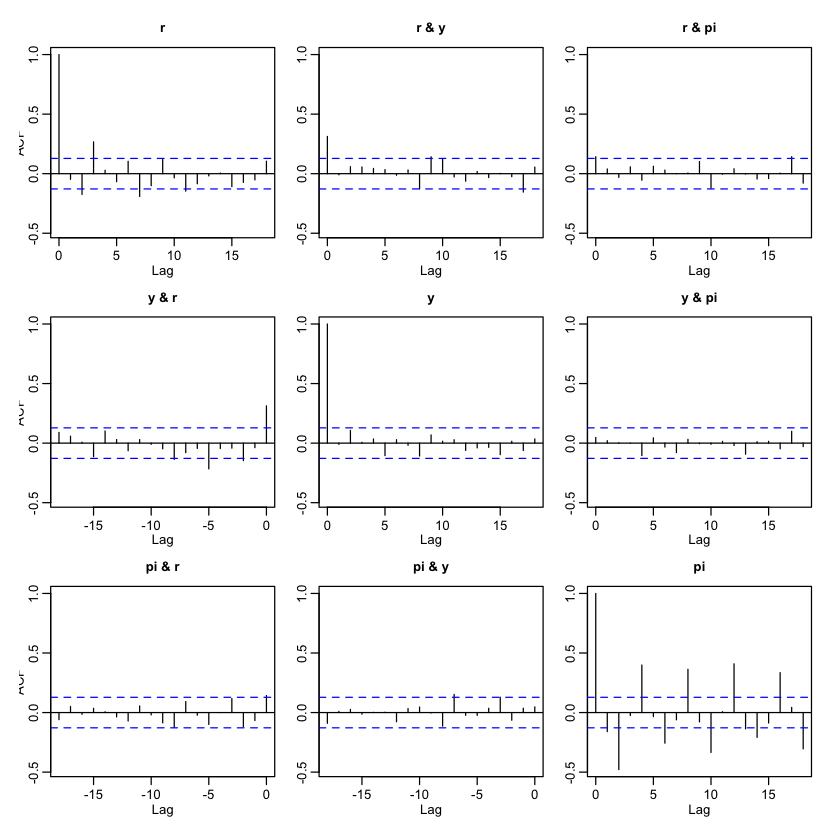

In [165]:
acf(residuals(varmytime))

The model fits well except for pi. pi has a residual autocorrelation. Others has no auto or cross correlation.

(g) Now fit a VAR(1)

In [16]:
var1_tbill=ar(D_tbill, order.max=1)
var1_loggdp=ar(D_loggdp, order.max=1)
var1_inflation=ar(D_inflation, order.max=1)

var1_tbill
var1_loggdp
var1_inflation


Call:
ar(x = D_tbill, order.max = 1)

Coefficients:
      1  
-0.1309  

Order selected 1  sigma^2 estimated as  0.8523


Call:
ar(x = D_loggdp, order.max = 1)

Coefficients:
     1  
0.3327  

Order selected 1  sigma^2 estimated as  6.994e-05


Call:
ar(x = D_inflation, order.max = 1)

Coefficients:
     1  
-0.436  

Order selected 1  sigma^2 estimated as  0.7562

(h) Suppose we observe the three variables that are each 20% above the mean change.

In [17]:
yn_tbill=var1_tbill$x.mean * 1.2
yn_loggdp=var1_loggdp$x.mean * 1.2
yn_inflation=var1_inflation$x.mean * 1.2

yn_tbill
yn_loggdp
yn_inflation

[1] -0.006842553

[1] 0.009089959

[1] -0.002398909

(i) Compute the h-step forecasts for h=1,2,5,10 using yn as the most recent observation. How do these forecasts compare to the mean var1$x.mean?

In [135]:
fitted(var1_tbill, h = 1,2,5,10)

lines(fitted(fit), col='red')

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [ ]:
fit <- ets(var1)

(j) Using the fitted VAR(1) model estimate above, examine the estimates of $\hat{\phi}$ . What do the elements of $\hat{\phi}$ suggest about the relationships amongst the changes in r, y and pi$?

The estimates are: -0.1309, 0.3327, -0.436

$\Delta y_t = d + \hat{\phi} \Delta y_{t-1} + \epsilon_t $

Changes in r has a negative relationship with the changes in r from one previous time.

Changes in y has a negative relationship with the changes in y from one previous time.

Changes in pi has a negative relationship with the changes in pi from one previous time.

(k) Compute the eigenvalues of Φˆ and state whether the VAR(1) is stationary.

In [185]:
ev_var1 = var1_tbill$sdev^2

ev_var1

ev_vartime = varmytime$sdev^2

ev_vartime

numeric(0)

numeric(0)

VAR(1) is stationary.

In [145]:
library(vars)


### 3. Same dataset

(a) Plot the t-bill and the differenced t-bill time series.

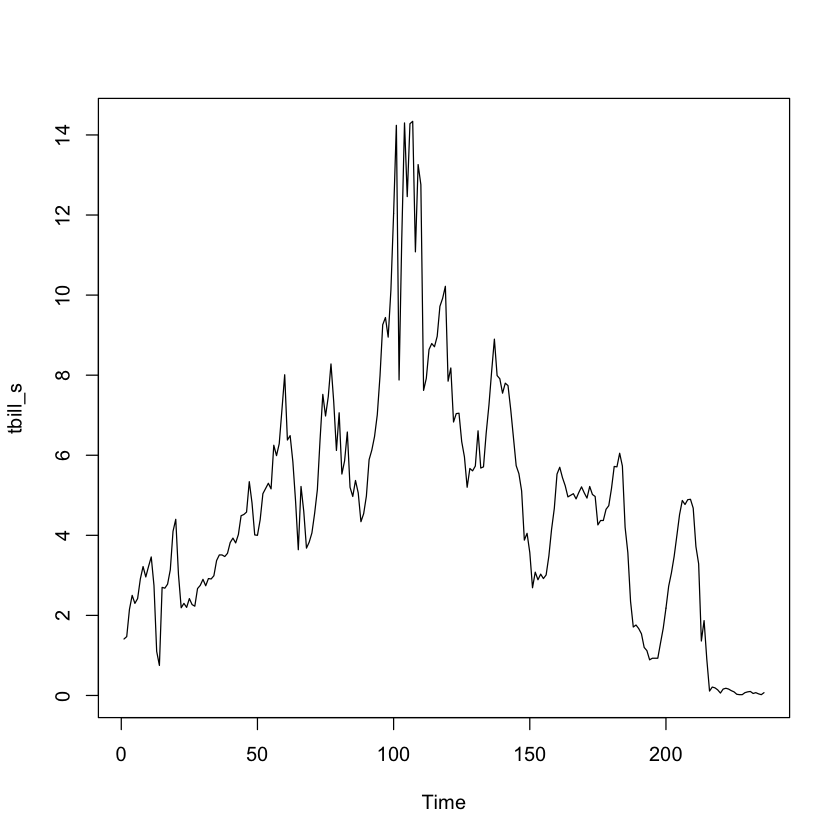

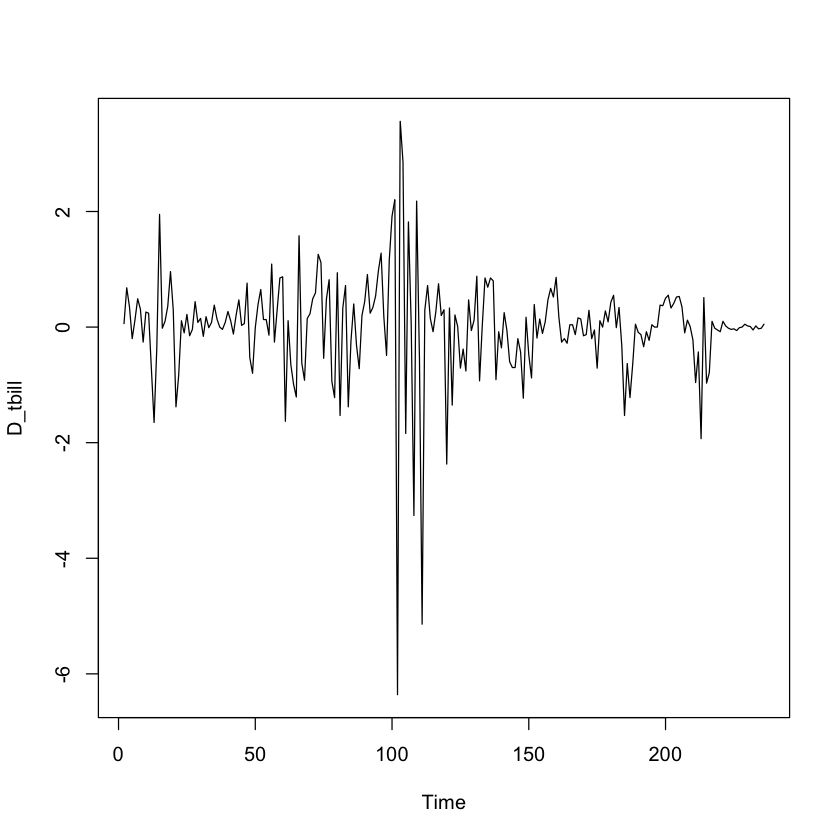

In [18]:
plot(tbill_s)

plot(D_tbill)

(b) Plot the ACF of both series.

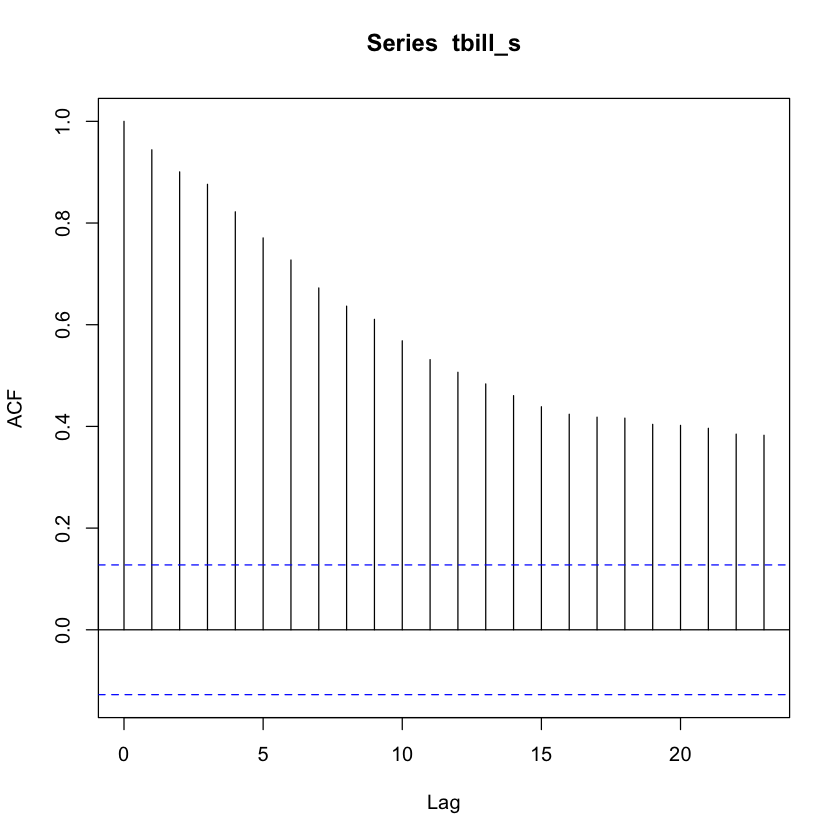

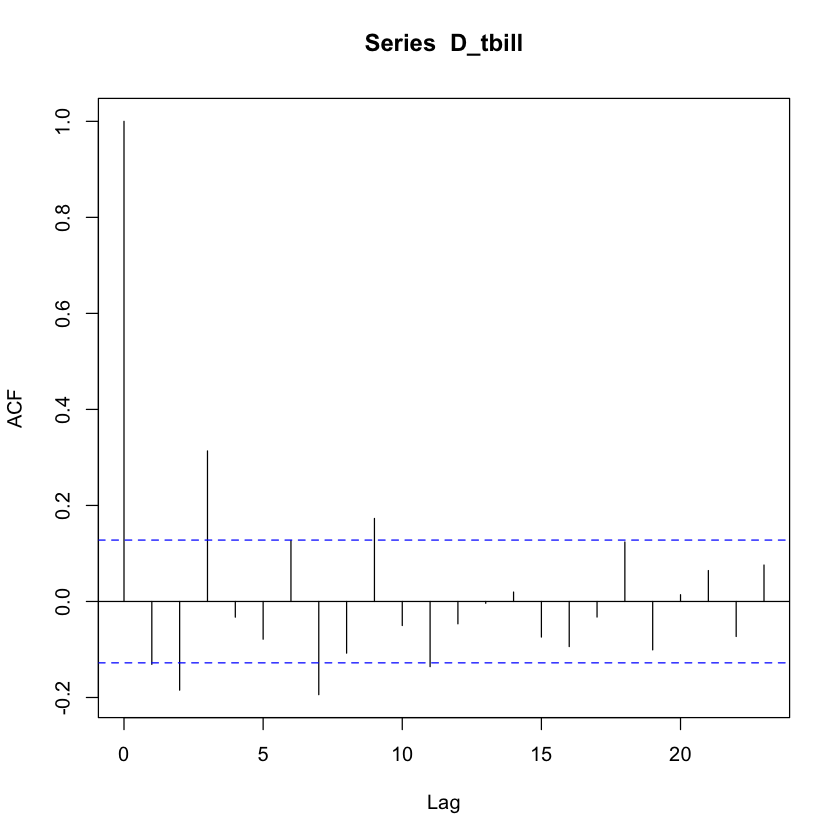

In [19]:
acf(tbill_s)
acf(D_tbill)

(c) Perform the ADF test on both series. Which series are stationary?

In [20]:
adf.test(tbill_s)
adf.test(D_tbill)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -1.287   0.219
[2,]   1 -1.131   0.275
[3,]   2 -0.936   0.344
[4,]   3 -1.235   0.237
[5,]   4 -1.239   0.236
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -2.28   0.217
[2,]   1 -1.98   0.335
[3,]   2 -1.50   0.522
[4,]   3 -2.09   0.291
[5,]   4 -2.14   0.273
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.55   0.346
[2,]   1 -2.27   0.461
[3,]   2 -1.82   0.652
[4,]   3 -2.34   0.431
[5,]   4 -2.39   0.410
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.41    0.01
[2,]   1 -14.09    0.01
[3,]   2  -7.79    0.01
[4,]   3  -6.85    0.01
[5,]   4  -6.07    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -17.38    0.01
[2,]   1 -14.07    0.01
[3,]   2  -7.78    0.01
[4,]   3  -6.84    0.01
[

The differenced series is stationary.

d) If you think Tbill is stationary, use Tbill. If you think the first difference of Tbill is stationary, use the differenced Tbill series. Fit the optimal (e.g., automatic) ARMA+GARCH model to the series you chose.

In [27]:
auto.arima(D_tbill, max.P=0, max.Q=0,ic="aic")

library(rugarch)

Series: D_tbill 
ARIMA(0,0,3) with zero mean 

Coefficients:
          ma1      ma2     ma3
      -0.1438  -0.1008  0.3312
s.e.   0.0603   0.0586  0.0660

sigma^2 = 0.7595:  log likelihood = -299.8
AIC=607.61   AICc=607.78   BIC=621.45

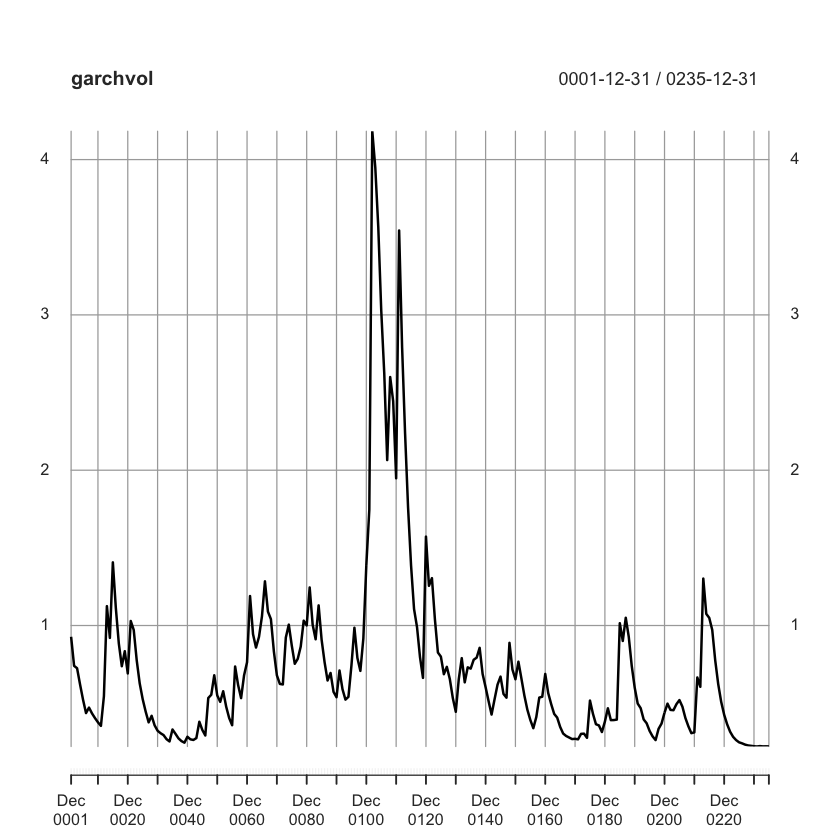

In [116]:
# Specify a standard GARCH model with constant mean
garchspec <- ugarchspec(mean.model = list(armaOrder = c(0,0,3)),
                 variance.model = list(model = "sGARCH"), 
                 distribution.model = "norm")

# Estimate the model
garchfit <- ugarchfit(data = D_tbill, spec = garchspec)

# Use the method sigma to retrieve the estimated volatilities 
garchvol <- sigma(garchfit)

# Plot the volatility
plot(garchvol)

(e) Which ARMA+GARCH model is being fit? Write down the model using the same parameter names as in the R output.

In [118]:
garchspec


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(0,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


sGARCH(1,1) and ARFIMA(0,0,0) with normal distribution.

$ARMA: y_t = \mu + \omega y_{t-1} + \epsilon_t$

$GARCH: \sigma^2 = w + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

(f) What are the estimates of each of the parameters in the model?

In [113]:
garchfit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.014268    0.029747  0.47964  0.63149
omega   0.018365    0.011184  1.64203  0.10058
alpha1  0.384073    0.068679  5.59227  0.00000
beta1   0.614926    0.045205 13.60309  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.014268    0.038266  0.37285 0.709257
omega   0.018365    0.030980  0.59279 0.553321
alpha1  0.384073    0.125725  3.05488 0.002252
beta1   0.614926    0.083240  7.38740 0.000000

LogLikelihood : -225.9222 

Information Criteria
------------------------------------
                   
Akaike       1.9568
Bayes        2.0157
Shibata      1.9562
Hannan-Quinn 1.9805

Weighted

$\mu:      0.014268  $

$\omega:   0.018365   $ 

$\alpha_1: 0.384073    $

$\beta_1:  0.614926$

(g) Plot the residuals, the standardized residuals, the residuals squared and the standardized residuals squared. What do these plots tell you?

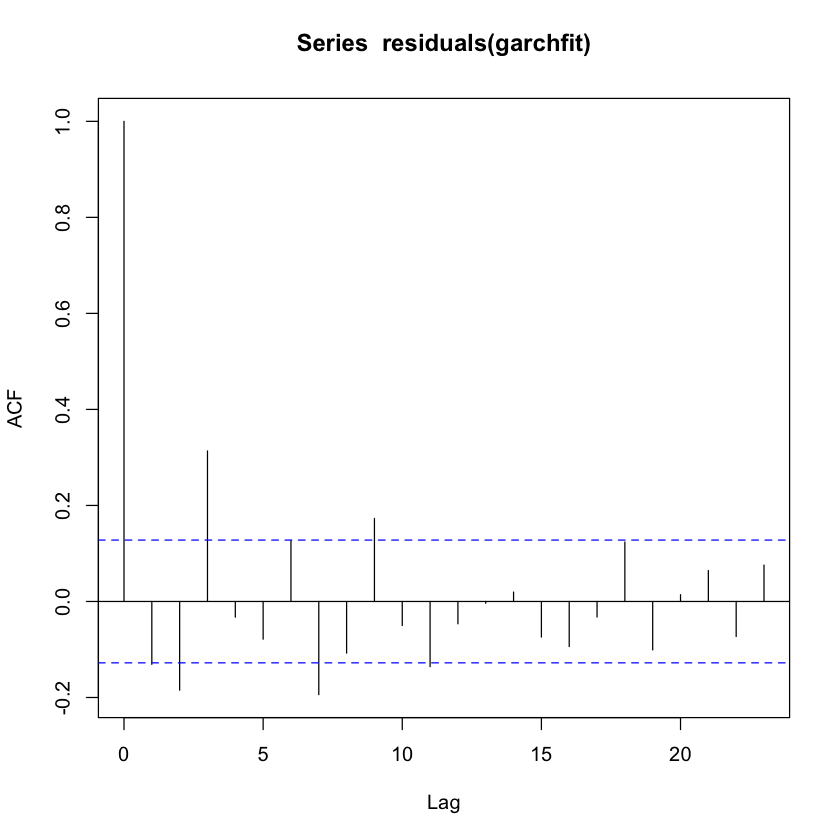

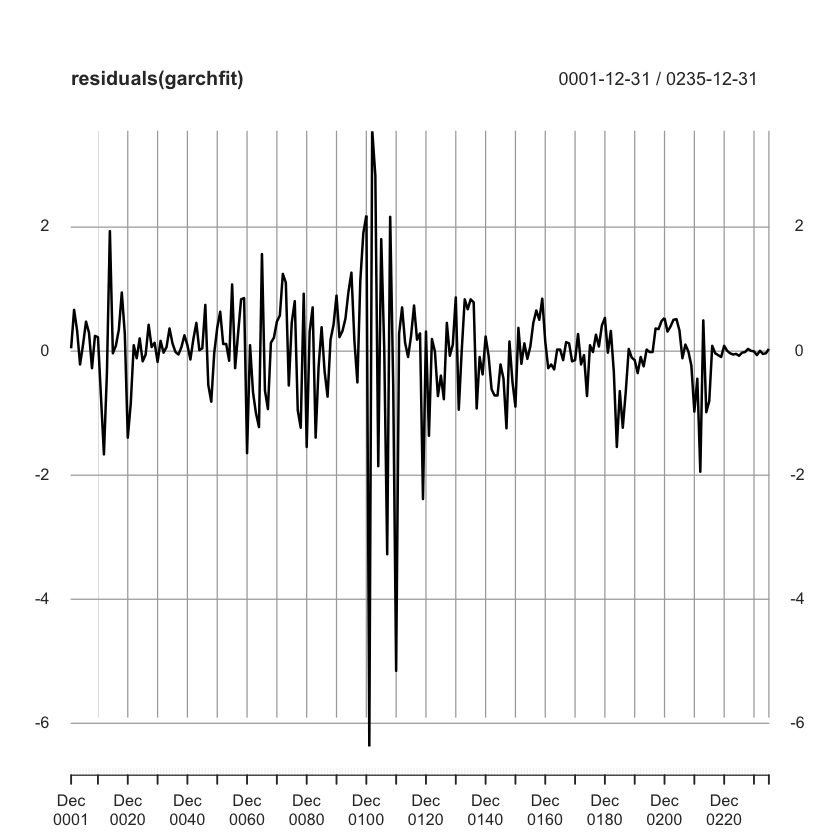

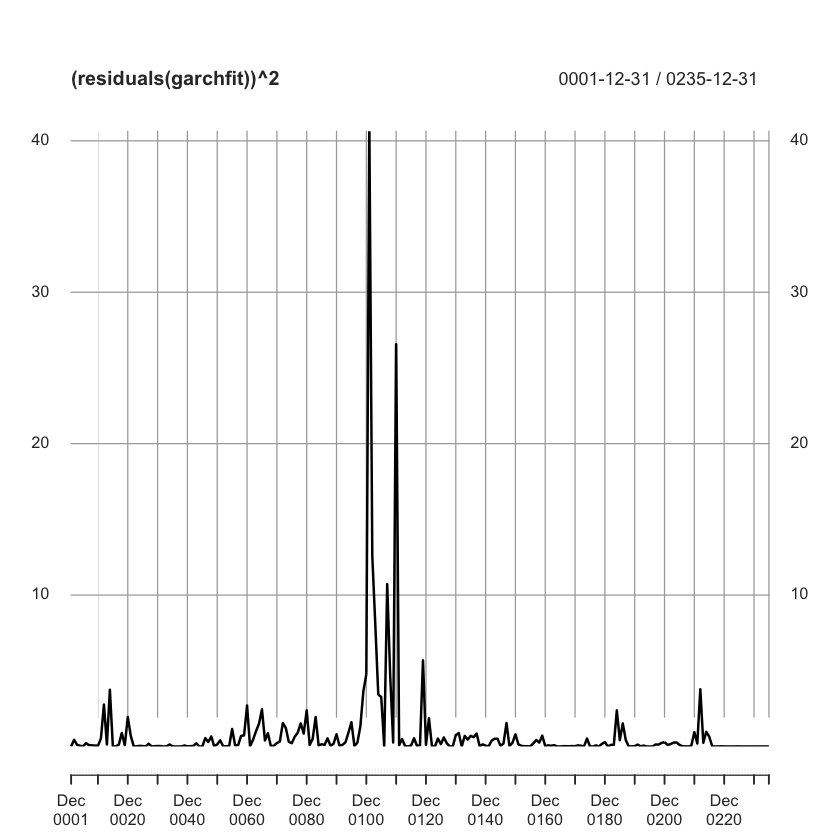

In [171]:
acf(residuals(garchfit))
plot(residuals(garchfit))
plot((residuals(garchfit))^2)

There is autocorrelation of residuals. (Little bit)

R-squared is a statistical measure of how close the data are to the fitted regression line.

(h) Fit an ARMA + GARCH model for the the first difference of the logarithm of the Tbill series. Any difference in working with differences of the logs of the Tbill vs. differences in Tbill?

Series: D_logtbill 
ARIMA(2,0,3) with zero mean 

Coefficients:
          ar1      ar2     ma1     ma2     ma3
      -0.1021  -0.9414  0.1344  0.8611  0.1097
s.e.   0.0958   0.0601  0.1130  0.0862  0.0737

sigma^2 = 0.08576:  log likelihood = -42.71
AIC=97.43   AICc=97.8   BIC=118.19


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(2,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.017447    0.008501   2.0523 0.040144
ar1     0.078088    0.080887   0.9654 0.334347
ar2    -0.120823    0.082308  -1.4679 0.142120
omega   0.004806    0.001734   2.7716 0.005578
alpha1  0.562496    0.119840   4.6937 0.000003
beta1   0.436504    0.106130   4.1129 0.000039

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.017447    0.013100  1.33181 0.182923
ar1     0.078088    0.157835  0.49475 0.620779
ar2    -0.120823    0.145028 -0.83311 0.404785
omega   0.004806    0.003745  1.28340 0.199353
alpha1  0.562496    0.273814  2.05430 0.039947
beta1   0.436504    0.258472  1.68879 0.091260

LogLike

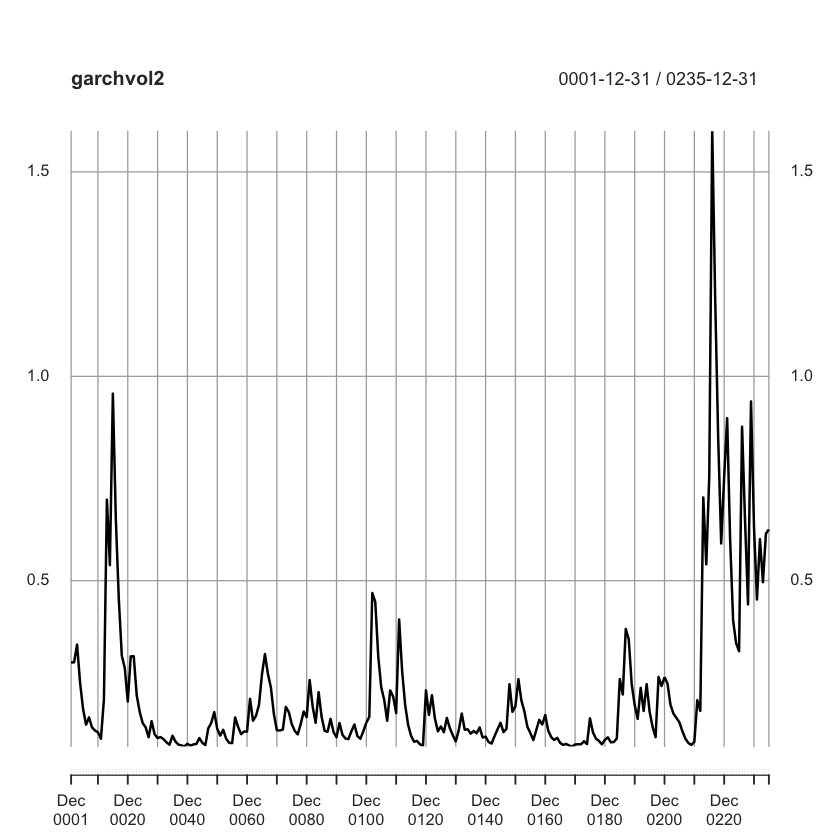

In [130]:
logtbill = log(tbill_s)

D_logtbill = diff(logtbill)

auto.arima(D_logtbill, max.P=0, max.Q=0,ic="aic")

# Specify a standard GARCH model with constant mean
garchspec2 <- ugarchspec(mean.model = list(armaOrder = c(2,0,3)),
                 variance.model = list(model = "sGARCH"), 
                 distribution.model = "norm")

# Estimate the model
garchfit2 <- ugarchfit(data = D_logtbill, spec = garchspec2)

# Use the method sigma to retrieve the estimated volatilities 
garchvol2 <- sigma(garchfit2)

# Plot the volatility
plot(garchvol2)

garchspec2

garchfit2

Difference: Now the model is sGARCH(1,1) with ARFIMA(2,0,0)

### 4. dataset "arrests"

The rows of the data set contain the names of 50 US states. 

The columns of the data set contain three categories related to the committed crime and the fourth category is the urban population.

(a) Examine the data. Report means by category (e.g., four means). Comment on your findings.

In [48]:
arrests <- read.csv("arrests.csv", header=TRUE)

head(arrests, n=10)

colMeans(arrests)

Murder,Assault,UrbanPop,Rape
13.2,236,58,21.2
10.0,263,48,44.5
8.1,294,80,31.0
8.8,190,50,19.5
9.0,276,91,40.6
7.9,204,78,38.7
3.3,110,77,11.1
5.9,238,72,15.8
15.4,335,80,31.9
17.4,211,60,25.8


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

There are three categories related to commiitted crime: Murder, Assault, Rape.

One category is Urban population.

On average there are 7.8 murder, 171 assaults, 65 urban population, and 21 rape in US.

(b) What is the variance of the variables?

In [43]:
var(arrests[,1]) #Murder
var(arrests[,2]) #Assault
var(arrests[,3]) #UrbanPop
var(arrests[,4]) #Rape

[1] 18.97047

[1] 6945.166

[1] 209.5188

[1] 87.72916

(c) Are the units of measurement comparable?

The units of measurement are comparable for the three categories related to the committed crime. (Ex: number of cases of murder)

The units of measurement are comparable between the Urban population and other categories. The unit is likely to be million people.

(d) Standardize the variables to have mean zero and standard deviation one. Perform principal components analysis using the prcomp() function

In [53]:
#scaled.arrests <- scale(arrests)

#colMeans(scaled.arrests)
#var(scaled.arrests[,1])

In [54]:
pca_arrests <- prcomp(arrests, scale=TRUE)

summary(pca_arrests)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

(e) What are the principal components loadings?

In [58]:
# loadings
head(pca_arrests$rotation)

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


(f) Plot the first two principal components

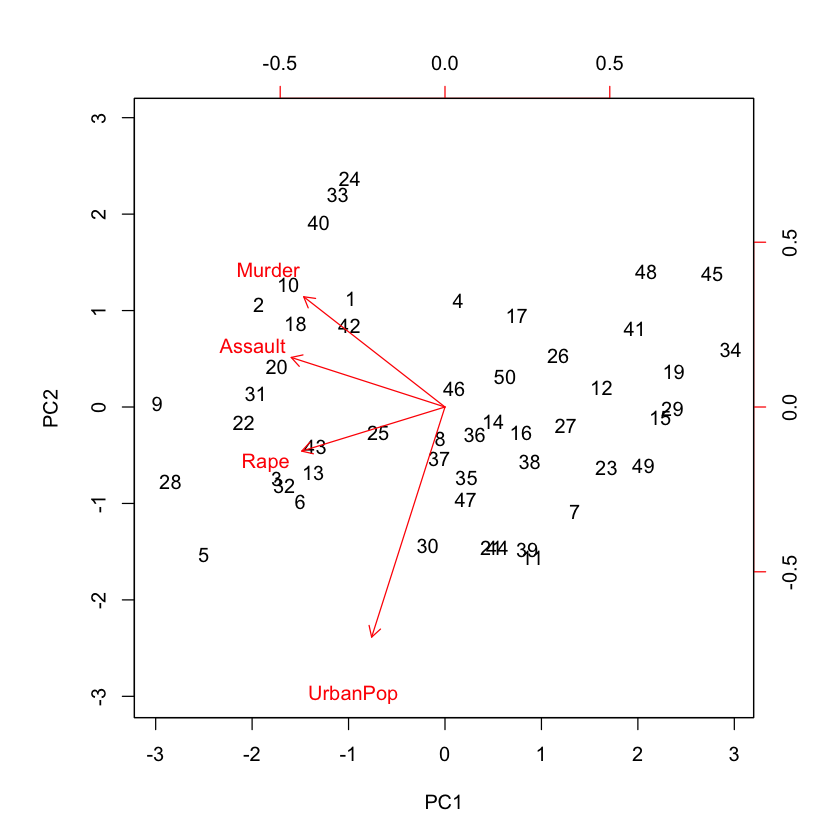

In [62]:
biplot(pca_arrests, scale=0)

(g) Compute the proportion of variance explained by each principal component

In [180]:
ev_pca = pca_arrests$sdev^2

ev_pca

[1] 2.4802416 0.9897652 0.3565632 0.1734301